In [1]:
import pandas as pd
url = 'https://drive.google.com/uc?id=1bybQ1r-oXo7Zlf8f-aPCggyVRGs378PS&export=download'
data = pd.read_csv(url)                     # to import pandas library

In [2]:
df=pd.DataFrame(data)

In [3]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# Answer the following question after doing your analysis 

1. For 'house of cards', what is the show id and who is the director ?
2. In which year highest number of tv shows and movies were released. show using graph? 
3. How many movies and TV shows are in the dataset? show with graph 
4. show all movies that were released in the year 2000?
5. Titles of all TV shows that were realeased in India only? 
6. Top 10 directors with the number of TV shows and movies? 
7. Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom".
8.  In how many movies/shows, Tom Holland was cast ?
9. What are the different Ratings defined by Netflix ?
10. What is the maximum duration of a Movie/Show on Netflix ?
11. Which individual country has the Highest No. of TV Shows ?


Cleaning the data, firstly fixing the date formats to extract the months and the year 


In [4]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'].str.strip())

In [5]:
df['Release_Month']=df['Release_Date'].dt.month

In [6]:
df['Release_Year']=df['Release_Date'].dt.year

Checking the dropping the null values

In [7]:
df.isnull().sum()

Show_Id             0
Category            0
Title               0
Director         2388
Cast              718
Country           507
Release_Date       10
Rating              7
Duration            0
Type                0
Description         0
Release_Month      10
Release_Year       10
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Show_Id          0
Category         0
Title            0
Director         0
Cast             0
Country          0
Release_Date     0
Rating           0
Duration         0
Type             0
Description      0
Release_Month    0
Release_Year     0
dtype: int64

checking and dropping the duplicate values 

In [10]:
df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Month,Release_Year
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,2019-04-05,TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...,4.0,2019.0
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,2020-09-04,TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...,9.0,2020.0


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Month,Release_Year
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12.0,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12.0,2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11.0,2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1.0,2020.0
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,7.0,2017.0


In [13]:
# Check if exact title "House of Cards" exists
exact_match = df['Title'].isin(['House of Cards'])
print(exact_match.any())  # Returns True if found, False if not

# To see the matching rows
matching_rows = df[df['Title'].isin(['House of Cards'])]
print(matching_rows)

True
     Show_Id Category           Title  \
2832   s2833  TV Show  House of Cards   

                                               Director  \
2832  Robin Wright, David Fincher, Gerald McRaney, J...   

                                                   Cast        Country  \
2832  Kevin Spacey, Robin Wright, Kate Mara, Corey S...  United States   

     Release_Date Rating   Duration                     Type  \
2832   2018-11-02  TV-MA  6 Seasons  TV Dramas, TV Thrillers   

                                            Description  Release_Month  \
2832  A ruthless politician will stop at nothing to ...           11.0   

      Release_Year  
2832        2018.0  


# Answering the first question 
1. For 'house of cards', what is the show id and who is the director ?

In [14]:
mask = df['Title'] == 'House of Cards'
index1 = df.index[mask]
if not index1.empty:
    print(index1)
else:
    print("House of Cards not found")

Index([2832], dtype='int64')


In [15]:
real_index= int(index1[0])
real_index

2832

In [16]:
print("Answering the first question")
print( " Show ID for House of Cards is :")
print(df['Show_Id'][real_index])
print("The director of House of Cards is :")
print(df['Director'][real_index])

Answering the first question
 Show ID for House of Cards is :
s2833
The director of House of Cards is :
Robin Wright, David Fincher, Gerald McRaney, John David Coles, David Manson


2. In which year highest number of tv shows and movies were released. show using graph? 

In [17]:
# the years are already seperated, lets see what we can do from here onwards
years=df.groupby('Release_Year').count()
# the years are already seperated, lets see what we can do from here onwards

In [18]:
import matplotlib.pyplot as plt

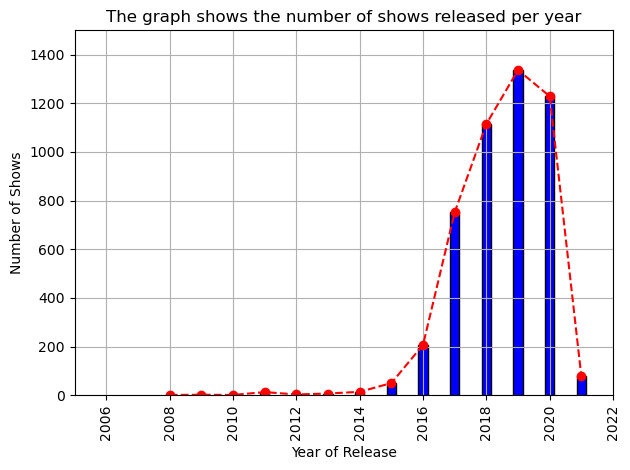

In [19]:
plt.bar(years.index, years['Show_Id'], color='blue', width=0.3, edgecolor='black')
plt.plot(years.index, years['Show_Id'], color='red', marker='o', linestyle='dashed')
# plt.legend().set_visible(True)
plt.xlim(2005, 2022)
plt.ylim(0,1500)
plt.xticks(rotation=90)
plt.xlabel("Year of Release")
plt.ylabel("Number of Shows")
plt.title("The graph shows the number of shows released per year")
plt.grid()
plt.tight_layout()
plt.show()

For a better visualization, i asked claude to show the values of the total number of shows released above the datapoint

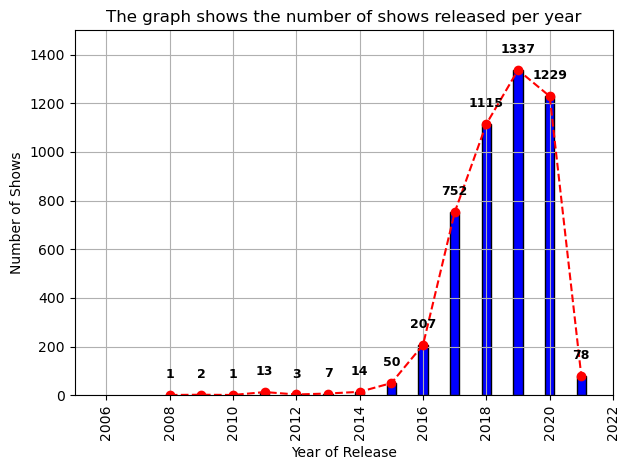

In [20]:
# Create a bar chart showing the number of shows released per year
plt.bar(years.index, years['Show_Id'], color='blue', width=0.3, edgecolor='black')

# Add a line plot with markers on top of the bars for better visualization
plt.plot(years.index, years['Show_Id'], color='red', marker='o', linestyle='dashed')

# Add text annotations above each data point on the line graph
# Logic: Loop through each year and its corresponding show count, then place text at (x, y+offset)
# The offset ensures the text appears above the marker point for better readability
for i, (year, count) in enumerate(zip(years.index, years['Show_Id'])):
    plt.annotate(str(count), 
                xy=(year, count),           # Position of the data point
                xytext=(0, 10),             # Offset: 10 points above the data point
                textcoords='offset points', # Use offset from the data point
                ha='center',                # Horizontal alignment: center
                va='bottom',                # Vertical alignment: bottom
                fontsize=9,                 # Font size for the annotations
                fontweight='bold')          # Make text bold for better visibility

# plt.legend().set_visible(True)
plt.xlim(2005, 2022)
plt.ylim(0,1500)
plt.xticks(rotation=90)
plt.xlabel("Year of Release")
plt.ylabel("Number of Shows")
plt.title("The graph shows the number of shows released per year")
plt.grid()
plt.tight_layout()
plt.show()

In [21]:
print("The answer to the second question.")
print(" The number of shows released per year is : 2019 ")

The answer to the second question.
 The number of shows released per year is : 2019 


3. How many movies and TV shows are in the dataset? show with graph 

In [22]:
df['Category'].value_counts()

Category
Movie      4673
TV Show     136
Name: count, dtype: int64

In [23]:
movies_and_tvshows=df.groupby("Category").count()

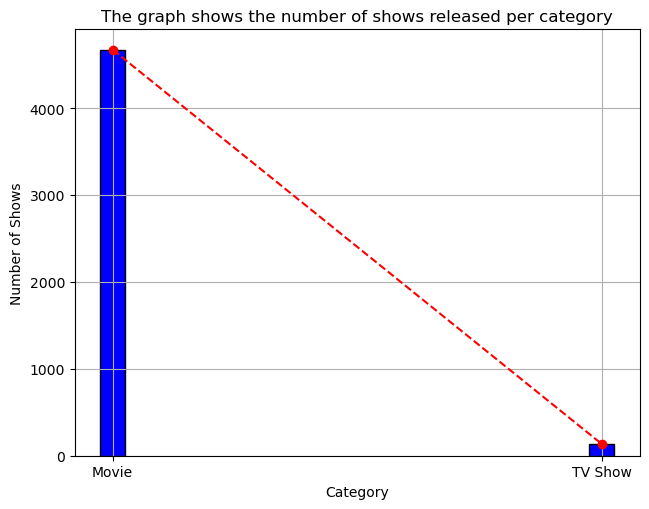

In [24]:
plt.bar(movies_and_tvshows.index, movies_and_tvshows['Show_Id'], color='blue', width=0.05, edgecolor='black')
plt.plot(movies_and_tvshows.index, movies_and_tvshows['Show_Id'], color='red', marker='o', linestyle='dashed')
plt.tight_layout()
plt.xlabel("Category")
plt.ylabel("Number of Shows")  
plt.title("The graph shows the number of shows released per category")
plt.grid()
plt.show()

Some changed made with claude for better visualization

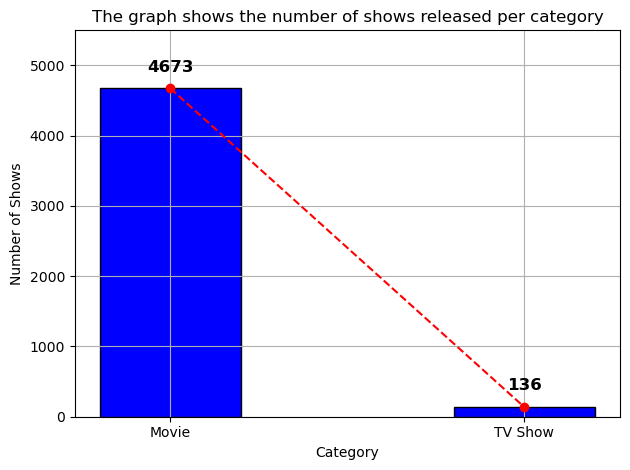

In [25]:
x_positions = [0, 1]  # Close positions for the two categories

# Create bar chart with custom positions and add annotations above bars
bars = plt.bar(x_positions, movies_and_tvshows['Show_Id'], color='blue', width=0.4, edgecolor='black')
plt.plot(x_positions, movies_and_tvshows['Show_Id'], color='red', marker='o', linestyle='dashed')

# Add value labels above each bar - shorter annotation code
for x, count in zip(x_positions, movies_and_tvshows['Show_Id']):
    plt.annotate(str(count), (x, count), xytext=(0, 10), textcoords='offset points', 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Set custom x-axis labels for the two categories
plt.xticks(x_positions, movies_and_tvshows.index)
plt.xlabel("Category")
plt.ylabel("Number of Shows")  
plt.title("The graph shows the number of shows released per category")
plt.grid()
plt.ylim(0, 5500)
plt.tight_layout()
plt.show()

In [26]:
print("The answer to the third question is pretty visible within the grpah itself.")

The answer to the third question is pretty visible within the grpah itself.


4. Show all movies that were released in the year 2000?

In [27]:
movies_sep2020= df[(df['Category'] == 'Movie')& (df['Release_Year'] == 2020)]
    

In [28]:
movies_sep2020

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Month,Release_Year
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1.0,2020.0
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",6.0,2020.0
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,2020-03-19,R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...,3.0,2020.0
27,s28,Movie,#Alive,Cho Il,"Yoo Ah-in, Park Shin-hye",South Korea,2020-09-08,TV-MA,99 min,"Horror Movies, International Movies, Thrillers","As a grisly virus rampages a city, a lone man ...",9.0,2020.0
28,s29,Movie,#AnneFrank - Parallel Stories,"Sabina Fedeli, Anna Migotto","Helen Mirren, Gengher Gatti",Italy,2020-07-01,TV-14,95 min,"Documentaries, International Movies","Through her diary, Anne Frank's story is retol...",7.0,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7746,s7745,Movie,"Yours Sincerely, Kanan Gill",Neville Shah,Kanan Gill,India,2020-04-24,TV-MA,72 min,Stand-Up Comedy,Revisiting life goals set in a letter written ...,4.0,2020.0
7750,s7749,Movie,الف مبروك,Ahmed Nader Galal,"Ahmed Helmy, Laila Ezz El Arab, Mahmoud El Fis...",Egypt,2020-04-25,TV-14,115 min,"Comedies, Dramas, International Movies","On his wedding day, an arrogant, greedy accoun...",4.0,2020.0
7762,s7761,Movie,Zaki Chan,Wael Ihsan,"Ahmed Helmy, Yasmin Abdulaziz, Hassan Hosny, H...",Egypt,2020-05-19,TV-PG,109 min,"Comedies, International Movies, Romantic Movies",An unqualified young man has his work cut out ...,5.0,2020.0
7783,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1.0,2020.0


5. Titles of all TV shows that were realeased in India only? 

In [29]:
Indian_Titles= df[(df['Country']=='India') & (df['Category']=='TV Show')]

In [30]:
print("Below is the list of all the TV shows that were released in India only :")
Indian_Titles['Title']

Below is the list of all the TV shows that were released in India only :


132                                 7 (Seven)
2406                                    GHOUL
3119             Jamtara - Sabka Number Ayega
4724                          Paava Kadhaigal
6037    Th Eena Meena Deeka Chase Comedy Show
Name: Title, dtype: object

7. Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom".


The column type is having a lot of enteries but is in string format as a whole and therefore we are breaking it down into a list which has those enteries those as seperate elements so we can individually interate over them. 


In [31]:
import ast
def clean_list(type):
    try:
        return ast.literal_eval(type)
    except (ValueError, SyntaxError):
        return type
        


In [32]:
df['Type'] = df['Type'].apply(clean_list)

In [33]:
solution = df[(df['Category']=='Movie') & (df['Type'].apply(lambda x: 'Comedies' in x if isinstance(x, list) else 'Comedies' == x))]


In [34]:
solution1=df[df['Country']=='United Kingdom']

In [35]:
# Combine and remove duplicates
solution_final = pd.concat([solution, solution1]).drop_duplicates()

In [36]:
print("The output for the required query is :")
solution_final

The output for the required query is :


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Month,Release_Year
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,9.0,2017.0
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,2021-01-01,PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",1.0,2021.0
84,s85,Movie,21 & Over,"Jon Lucas, Scott Moore","Miles Teller, Skylar Astin, Justin Chon, Sarah...",United States,2019-04-16,R,93 min,Comedies,Jeff's straight-and-narrow life changes abrupt...,4.0,2019.0
148,s149,Movie,A Bad Moms Christmas,"Jon Lucas, Scott Moore","Mila Kunis, Kristen Bell, Kathryn Hahn, Susan ...","United States, China",2020-02-14,R,104 min,Comedies,"Stressed-out moms Amy, Carla and Kiki are back...",2.0,2020.0
174,s175,Movie,A Futile and Stupid Gesture,David Wain,"Will Forte, Domhnall Gleeson, Martin Mull, Joe...",United States,2018-01-26,TV-MA,102 min,Comedies,"In a brief life full of triumph and failure, ""...",1.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7482,s7481,Movie,War on Everyone,John Michael McDonagh,"Alexander Skarsgård, Michael Peña, Theo James,...",United Kingdom,2019-12-03,R,98 min,"Action & Adventure, Comedies",Terry and Bob excel at blackmailing small-time...,12.0,2019.0
7596,s7595,Movie,White Chamber,Paul Raschid,"Shauna MacDonald, Oded Fehr, Amrita Acharia, S...",United Kingdom,2019-08-01,TV-MA,89 min,"Sci-Fi & Fantasy, Thrillers","When a civil war ravages the UK, a scientist a...",8.0,2019.0
7601,s7600,Movie,White Island,Benjamin Turner,"Lyndon Ogbourne, Billy Zane, Billy Boyd, Joel ...",United Kingdom,2017-09-25,TV-MA,91 min,"Comedies, Independent Movies, Thrillers",Returning to Ibiza after several years walking...,9.0,2017.0
7615,s7614,Movie,Why Are We Getting So Fat?,"Milla Harrison-Hansley, Alicky Sussman",Giles Yeo,United Kingdom,2019-02-01,TV-14,50 min,Documentaries,A Cambridge geneticist dispels misconceptions ...,2.0,2019.0


8.  In how many movies/shows, Tom Holland was cast ?



In [37]:


def clean_list1(cast_data1):
    if pd.isna(cast_data1):
        return []
    
    if isinstance(cast_data1, str):
        try:
            # Try to parse as Python literal (for strings like "['Tom Holland', 'Zendaya']")
            return ast.literal_eval(cast_data1)
        except (ValueError, SyntaxError):
            # If that fails, split by comma (for strings like "Tom Holland, Zendaya")
            return [name.strip() for name in cast_data1.split(',')]
    
    if isinstance(cast_data1, list):
        return cast_data1
    
    return [str(cast_data1)]  # Convert anything else to single-item list

In [38]:
actor = df.copy()
actor['Cast'] = actor['Cast'].apply(clean_list1)
actor = actor.explode('Cast').reset_index(drop=True)  # Reset index to avoid duplicates

# Clean up any remaining spaces
actor['Cast'] = actor['Cast'].str.strip()

# Now search for Tom Holland
actor_tom = actor[actor['Cast'] == 'Tom Holland']
print(f"Tom Holland appears in {len(actor_tom)} movies/shows")


Tom Holland appears in 4 movies/shows


9. What are the different Ratings defined by Netflix ?

In [39]:
df['Rating']=df['Rating'].apply(clean_list)


In [40]:
print("The different types of rating defined by Netflix across different tv shows and movies are :")
df['Rating'].value_counts()

The different types of rating defined by Netflix across different tv shows and movies are :


Rating
TV-MA       1666
TV-14       1133
R            654
TV-PG        413
PG-13        375
PG           238
TV-G          80
TV-Y          71
TV-Y7         69
NR            62
G             38
UR             5
TV-Y7-FV       3
NC-17          2
Name: count, dtype: int64

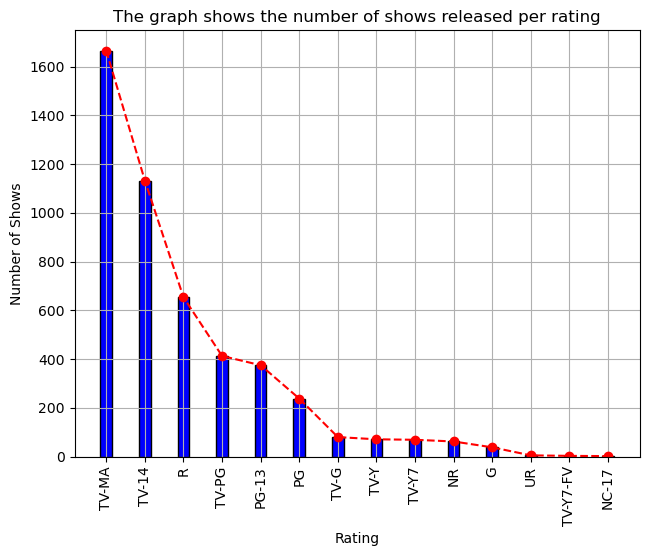

In [41]:
# Method 2: If Rating column contains lists that need to be exploded
df_rating = df.copy()
df_rating['Rating'] = df_rating['Rating'].apply(clean_list)
df_rating = df_rating.explode('Rating').reset_index(drop=True)
rating = df_rating['Rating'].value_counts()

plt.bar(rating.index, rating.values, color='blue', width=0.3, edgecolor='black')
plt.plot(rating.index, rating.values, color='red', marker='o', linestyle='dashed')
plt.tight_layout()  
plt.xlabel("Rating")
plt.ylabel("Number of Shows")  
plt.title("The graph shows the number of shows released per rating")
plt.grid()
plt.xticks(rotation=90)
plt.show()

10. What is the maximum duration of a Movie on Netflix ?

In [42]:
#somehow messed up with the df dataset itself so I had to make a copy

In [43]:
url = 'https://drive.google.com/uc?id=1bybQ1r-oXo7Zlf8f-aPCggyVRGs378PS&export=download'
data_new = pd.read_csv(url)                     

In [44]:
df_new=data_new.copy()

In [45]:
# More robust approach
movies = df_new[df_new['Category'] == 'Movie'].copy()

# Clean duration values
def extract_minutes(duration_str):
    if pd.isna(duration_str):
        return None
    # Extract numbers from string like "123 min"
    import re
    numbers = re.findall(r'\d+', str(duration_str))
    if numbers:
        return int(numbers[0])
    return None

movies['Duration_Minutes'] = movies['Duration'].apply(extract_minutes)

# Find maximum duration
max_duration = movies['Duration_Minutes'].max()
print(f"Maximum duration of a Movie on Netflix: {max_duration} minutes")

# Find the movie with maximum duration
max_movie = movies[movies['Duration_Minutes'] == max_duration]
print(f"\nMovie with maximum duration:")
print(max_movie[['Title', 'Duration']].to_string(index=False))

Maximum duration of a Movie on Netflix: 312 minutes

Movie with maximum duration:
                     Title Duration
Black Mirror: Bandersnatch  312 min


11. Which individual country has the Highest No. of TV Shows ?


In [46]:
tv_shows = df_new[df_new['Category'] == 'TV Show']


In [47]:
tv_shows['Country'].value_counts()

Country
United States                                                705
United Kingdom                                               204
Japan                                                        157
South Korea                                                  147
India                                                         71
                                                            ... 
Canada, United States, United Kingdom, France, Luxembourg      1
United States, Italy                                           1
Chile, Italy                                                   1
Canada, United Kingdom                                         1
United States, France, South Korea, Indonesia                  1
Name: count, Length: 183, dtype: int64

In [48]:
print("United states clearly has the highest number of TV shows on Netflix")

United states clearly has the highest number of TV shows on Netflix
